# Python Assignment
Import necessary libraries

In [1]:
import wget
from Bio import SeqIO
from Bio import AlignIO
from Bio.Data import CodonTable
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd

If the data and pseudo-code files need to be retrieved from GitHub, uncomment & run below chunk

In [2]:
# wget.download('https://raw.githubusercontent.com/EEOB-BioData/BCB546-Spring2022/main/assignments/Python_Assignment/penguins_cytb.fasta', out = '../Data')
# wget.download('https://raw.githubusercontent.com/EEOB-BioData/BCB546-Spring2022/main/assignments/Python_Assignment/penguins_mass.csv', out = '../Data')
# wget.download('https://raw.githubusercontent.com/EEOB-BioData/BCB546-Spring2022/main/assignments/Python_Assignment/sequence_translate.py', out = "../Code")

### 1. Get nucleotide sequence from fasta file

Import sequences from file and store the sequences to a dictionary

Input: FASTA file path (i.e. '../Data/penguins_cytb.fasta')  
Output: Nucleotide sequences stored as a dictionary to a key representing first two descriptors of the FASTA label

In [3]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {} #create empty dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): #iterate over the sequence file
        description = record.description.split() #return description of current record and split it into a list
        species_name = description[1] + " " + description[2] #concatenate 1st string in the list with the 2nd separated by a space
        sequence_data_dict[species_name] = record.seq #extract sequence from current record and put it in the dictionary under the species name
    return(sequence_data_dict) #print to screen the dictionary

### 2. Translate nucleotide sequence

The unabiguous table for vertabrate mitochondrial DNA is used to translate nucleotides to the respective amino acids. All table options and further details are available at [NCBI](https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi). Amino acid sequences are returned back to dictionary format.

Input: Nucleotide sequences dictionary; prefered input is output of 'get_sequences_from_file()'   
Output: Amino acid sequence dictionary stored to same keys as input

In [4]:
def translate_function(string_nucleotides):
    AA_data_dict = {} #assign empty dictionary
    mito_table = CodonTable.unambiguous_dna_by_name['Vertebrate Mitochondrial']
    for key, value in string_nucleotides.items(): #loop over each key, value pair
        AA_seq_string = "" #create empty variable
        for reading_frame in range(0, len(value), 3): #loop over each position which represents the first nucleotide of a codon in the sequence string
            codon = value[reading_frame:reading_frame+3] #assign the nucleotides of the codon to variable
            if (reading_frame == len(value)-3 and codon in ("TAA", "TAG", "TGA")) != True: #if the last codon isn't a stop codon
                AA_seq_string += mito_table.forward_table[codon] #get the amino acid which represents the codon
        AA_data_dict[key] = AA_seq_string #assign sequence to new AA dictionary using with identical key
    return(AA_data_dict)

### 3. Alternative function for translating nucleotide sequence

To match the format of 'translate_function()', options for Bio.Seq.translate() were included to translate codons using the same codon table (table 2 = vertebrate mitochondrial) and to leave off the final stop codon. Options were obtained from [Bio.Seq.translate description](https://biopython.org/docs/1.78/api/Bio.Seq.html?highlight=seq). Amino acid sequences are returned in dictionary format. 

Input: Nucleotide sequences dictionary; prefered input is output of 'get_sequences_from_file()'   
Output: Amino acid sequence dictionary stored to same keys as input

In [5]:
def alt_translate_function(string_nucleotides):
    AA_data_dict = {} #assign empty dictionary
    for key in string_nucleotides.keys(): #loop over each key, value pair
        AA_data_dict[key] = string_nucleotides[key].translate(table=2, cds=True) 
        #translate the current sequence ## Table 27: TGA -> STOP or W
    return(AA_data_dict)

### 4. Molecular Weight Function

Calculate molecular weight of amino acid sequence

Input: Amino acid sequence dictionary; prefered input is output of 'translate function()' or 'alt_translate_function()  
Output: Dictionary of molecular weight values stored to identical keys as input

In [6]:
def compute_molecular_weight(aa_dict):
    mol_wt_dict = {}
    for key in aa_dict.keys():
        prot_analysis = ProteinAnalysis(str(aa_dict[key]))
        mol_wt_dict[key] = prot_analysis.molecular_weight()
    return(mol_wt_dict) 

### 5. GC Content Analysis Function

Calculate GC content of nucleotide sequence.

Input: Nucleotide sequence dictionary; prefered input is output of 'get_sequences_from_file()'  
Output: Dictionary of GC fraction stored to identical keys as input


In [7]:
def compute_GC_content(dict):
    GC_dict = {}
    for key in dict.keys():
        GC_dict[key] = (dict[key].count("G") + dict[key].count("C")) / len(dict[key])
        # count G's and C's, add and divide by total
        # and store to dictionary under species name key
    return(GC_dict)

## Main

Store penguin files to variables

In [8]:
cytb_seqs = get_sequences_from_file("../Data/penguins_cytb.fasta") 
penguins_df = pd.read_csv("../Data/penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

### 6. Add Columns
Add empty columns to the penguin DataFrame for molecular weight and GC content

In [9]:
penguins_df['molecular_weight'] = 'NaN'
penguins_df['GC_content'] = 'NaN'
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


### 7. Add Molecular Weights and GC Content to DataFrame

Use previously described function to get molecular weights and GC content of sequences stored to 'cytb_seqs' variable.

In [10]:
cytb_aa = translate_function(cytb_seqs)
cytb_MW = compute_molecular_weight(cytb_aa)
cytb_GC = compute_GC_content(cytb_seqs)

pandas.DataFrame.loc usage was modeled after examples in [pandas reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

In [11]:
for species_name in penguins_df.species: 
    row = penguins_df[penguins_df.species == species_name].index #get data frame row number of the current species
    penguins_df.loc[row, 'molecular_weight'] = cytb_MW[species_name] # assign MW dictionary value to correct DataFrame location
    penguins_df.loc[row, 'GC_content'] = cytb_GC[species_name] # assign GC content dictionary value to correct DataFrame location

In [12]:
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6021,0.483815
1,Aptenodytes patagonicus,13.40,42563.7067,0.496938
2,Eudyptes chrysocome,2.80,42475.5753,0.511811
3,Eudyptes chrysolophus,4.50,42445.5493,0.509186
4,Eudyptes sclateri,4.25,42475.5753,0.508311
5,Eudyptula minor,1.60,42491.6408,0.492563
6,Pygoscelis adeliae,4.60,42458.614,0.490814
7,Pygoscelis antarctica,4.10,42404.5423,0.47769
8,Pygoscelis papua,6.10,42595.8759,0.471566
9,Spheniscus demersus,3.20,42431.549,0.48294


### 8. Plotting Species by Mass

<AxesSubplot:xlabel='species'>

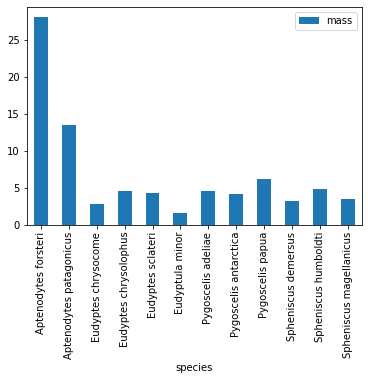

In [13]:
penguins_df.plot(x='species', y='mass', kind='bar')

When plotting the species by mass Aptenodytes forsteri appears to be the species that weighs the most (28) and Eudyptula minor the species that weighs the least (1.6). The mass of the rest of the penguin species generally ranges between 2 and 6. Another species of high weight include Aptenodytes patagonicus (13.4). The geographic range of Eudyptula minor extends along the southern coast of Australia, including Tasmania, and New Zealand [(Peucker et al. 2009)](https://doi.org/10.1525/auk.2009.08055).

### 9. Plot Molecular Weight by GC Content

<AxesSubplot:xlabel='GC_content'>

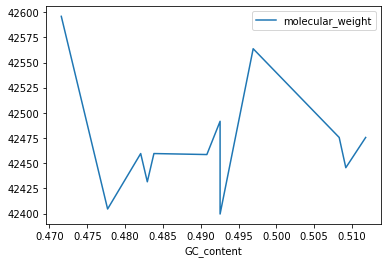

In [15]:
data_plot_9 = penguins_df.sort_values(by='GC_content') #sort so GC will plot in ascending order
data_plot_9.plot(x='GC_content', y='molecular_weight', kind='line')

There appears to be no correlation between GC content and protein molecular weight of a DNA sequence. Overall, these sequences do not appear to have a disproportionate GC content since values are near 0.5 (0.47-0.51).

### 10. Save DataFrame

In [16]:
penguins_df.to_csv('../Data/penguins_mass_cytb.csv')

### 11. Bonus

Create DataFrame with nucleotide counts for all nucleotides

In [17]:
Nucleotide_Proportions = pd.DataFrame()
for species in cytb_seqs.keys():
    ct_a = cytb_seqs[species].count("A") #count A's
    ct_g = cytb_seqs[species].count("G") #count G's
    ct_c = cytb_seqs[species].count("C") #count C's
    ct_t = cytb_seqs[species].count("T") #count T's
    ct_total = ct_a + ct_g + ct_c + ct_t #sum A, G, C, and T counts
    d={'Species': species, 'A': ct_a, 'G': ct_g, 'C': ct_c, 'T': ct_t, 'Total': ct_total} #format as a dataframe row
    Nucleotide_Proportions = Nucleotide_Proportions.append(d, ignore_index=True) #append row to dataframe

Transform data for plotting

In [18]:
NP_transpose = Nucleotide_Proportions.T # transpose
NP_species = NP_transpose.loc['Species'] # extract species names
NP_labeled = NP_transpose.rename(columns=NP_species) # assign species names to column names 
data_plot11 = NP_labeled.loc['A':'T'] # subset to exclude total

In [19]:
data_plot11

,Aptenodytes forsteri,Aptenodytes patagonicus,Eudyptes chrysocome,Eudyptes chrysolophus,Eudyptes sclateri,Eudyptula minor,Pygoscelis adeliae,Pygoscelis antarctica,Pygoscelis papua,Spheniscus demersus,Spheniscus humboldti,Spheniscus magellanicus
A,318.0,313.0,306.0,304.0,310.0,314.0,308.0,323.0,321.0,320.0,318.0,319.0
G,140.0,146.0,144.0,146.0,140.0,136.0,146.0,145.0,136.0,135.0,136.0,135.0
C,413.0,422.0,441.0,436.0,441.0,427.0,415.0,401.0,403.0,417.0,427.0,416.0
T,272.0,262.0,252.0,257.0,252.0,266.0,274.0,274.0,283.0,271.0,262.0,273.0


Plot each species nucleotide composition as a pie chart

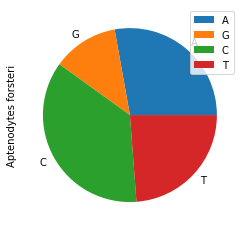

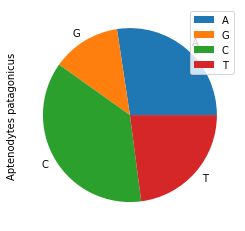

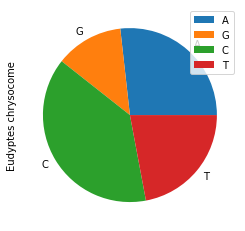

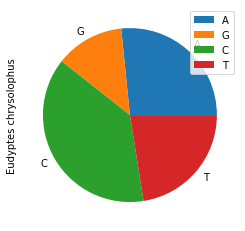

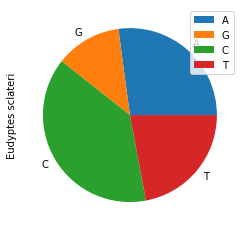

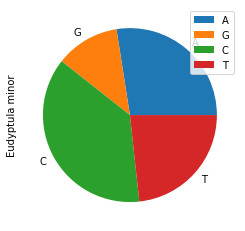

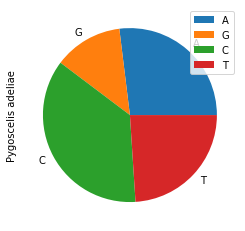

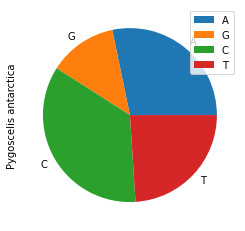

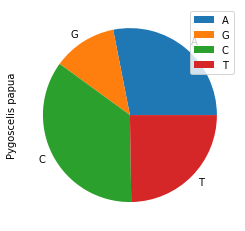

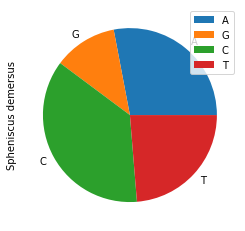

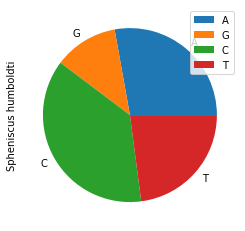

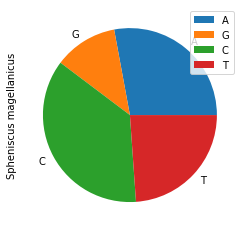

In [20]:
for species in data_plot11.columns:
    data_plot11.plot(kind='pie', y=species)

Nucleotide proportions are very similar between species. Some difference in cytosine content is visible when comparing the plots, but ranges of differences are small overall. 